## Дипломная работа по курсу «Python для анализа данных»

1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [24]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

In [25]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
data.shape

(14999, 10)

In [27]:
data = data.dropna()

In [28]:
data.shape

(14999, 10)

Нулевых значений в данных нет.

## Основные статистики для количественных показателей

In [29]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**основные статистики для показателя "уровень удовлетворенности работой"**

In [30]:
print(f'среднее {statistics.mean(data.satisfaction_level):.2f}')
print(f'медиана {statistics.median(data.satisfaction_level):.2f}')
print(f'минимум {data.satisfaction_level.min():.2f}')
print(f'максимум {data.satisfaction_level.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.satisfaction_level):.2f}')

среднее 0.61
медиана 0.64
минимум 0.09
максимум 1.00
среднее отклонение 0.25


**основные статистики для показателя "время с момента последней оценки в годах"**

In [31]:
print(f'среднее {statistics.mean(data.last_evaluation):.2f}')
print(f'медиана {statistics.median(data.last_evaluation):.2f}')
print(f'минимум {data.last_evaluation.min():.2f}')
print(f'максимум {data.last_evaluation.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.last_evaluation):.2f}')

среднее 0.72
медиана 0.72
минимум 0.36
максимум 1.00
среднее отклонение 0.17


**основные статистики для показателя "количество проектов, выполненных за время работы"**

In [32]:
print(f'среднее {statistics.mean(data.number_project):.2f}')
print(f'медиана {statistics.median(data.number_project):.2f}')
print(f'минимум {data.number_project.min():.2f}')
print(f'максимум {data.number_project.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.number_project):.2f}')

среднее 3.80
медиана 4.00
минимум 2.00
максимум 7.00
среднее отклонение 1.23


**основные статистики для показателя "среднее количество часов, проведенных на работе за месяц"**

In [33]:
print(f'среднее {statistics.mean(data.average_montly_hours):.2f}')
print(f'медиана {statistics.median(data.average_montly_hours):.2f}')
print(f'минимум {data.average_montly_hours.min():.2f}')
print(f'максимум {data.average_montly_hours.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.average_montly_hours):.2f}')

среднее 201.05
медиана 200.00
минимум 96.00
максимум 310.00
среднее отклонение 49.94


**основные статистики для показателя "стаж работы в компании в годах"**

In [34]:
print(f'среднее {statistics.mean(data.time_spend_company):.2f}')
print(f'медиана {statistics.median(data.time_spend_company):.2f}')
print(f'минимум {data.time_spend_company.min():.2f}')
print(f'максимум {data.time_spend_company.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.time_spend_company):.2f}')

среднее 3.50
медиана 3.00
минимум 2.00
максимум 10.00
среднее отклонение 1.46


## Матрица корреляций

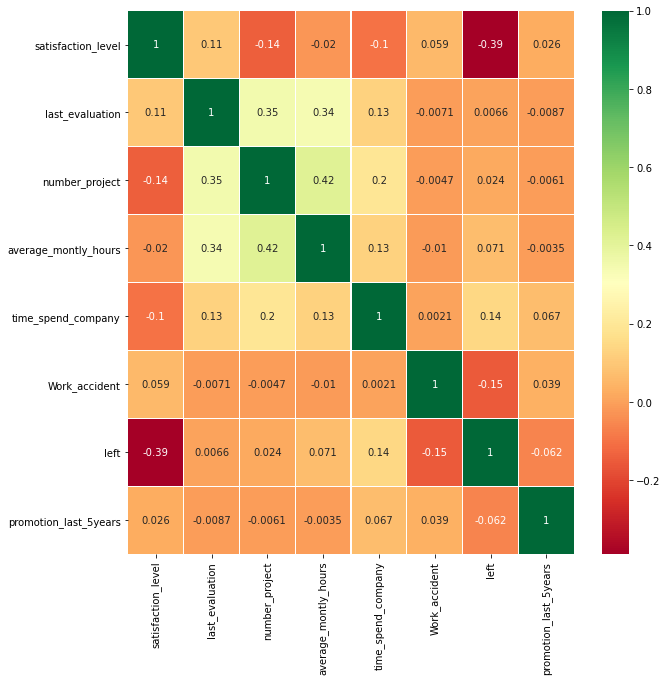

In [35]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [36]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [37]:
data.loc[data.salary == 'low', 'new_salary'] = 0
data.loc[data.salary == 'medium', 'new_salary'] = 1
data.loc[data.salary == 'high', 'new_salary'] = 2

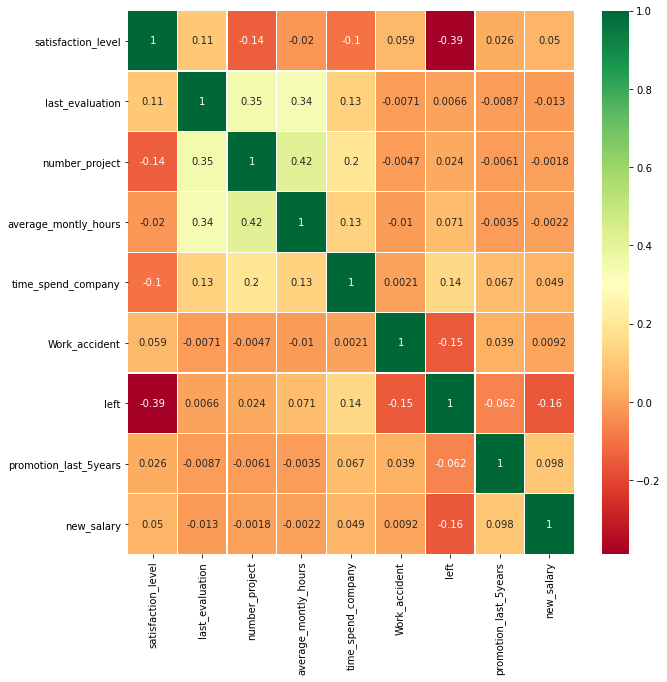

In [38]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## выяснили, что корреляции между зп и остальными показателями тоже нет (по крайней мере линейной)

На мой субъективный взгляд корреляция очень и очень слабая. Максимальная корреляция наблюдается между средним количеством часов, проведенных на работе, и количеством проектов (что логично), что в свою очередь влияет на время с момента последнего повышения. Вот на эти показатели и построю визуализацию.

**Визуализация нескольких переменных**

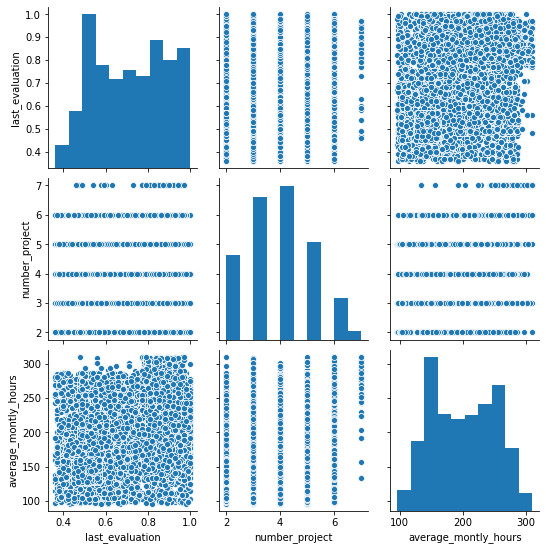

In [39]:
sns.pairplot(data, vars=['last_evaluation', 'number_project', 'average_montly_hours'], 
             kind="scatter")

Вы видите здесь какую-то четкую зависимость? Я нет.

**Использование t-test для проверки гипотезы о том , что средняя удовлетворенность работой сотрудников с разной зарплатой различна.**
В условии сказано про проверку взаимосвязей между переменными, для меня это больше про корреляционные тесты, а t-test все-таки про проверку гипотез.

In [43]:
low_salary = data[data['new_salary']==0]['satisfaction_level']
middle_salary = data[data['new_salary']==1]['satisfaction_level']
high_salary = data[data['new_salary']==2]['satisfaction_level']
print(stats.ttest_ind(low_salary, middle_salary))
print(stats.ttest_ind(middle_salary, high_salary))
print(stats.ttest_ind(high_salary, low_salary))

Ttest_indResult(statistic=-4.928592335569859, pvalue=8.378854439781171e-07)
Ttest_indResult(statistic=-2.081861364315287, pvalue=0.03738816176204982)
Ttest_indResult(statistic=4.76273109535092, pvalue=1.9413281282548522e-06)


По pvalue можно судить, что есть существенные различия в удовлетворенности работой при разных вилках зарплат.

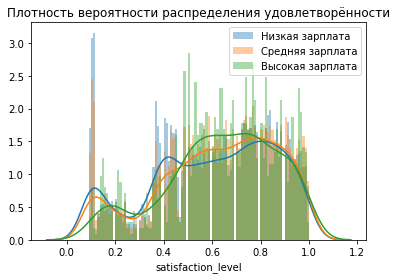

In [45]:
sns.distplot(low_salary, 100)
sns.distplot(middle_salary, 100)
sns.distplot(high_salary, 100)
plt.title('Плотность вероятности распределения удовлетворённости')
plt.legend(['Низкая зарплата', 'Средняя зарплата', 'Высокая зарплата'])
plt.show()

По графику видно, что среди сотрудников с высокими зарплатами уровень удовлетворенности тоже выше.

**Количество сотрудников в разрезе департамента**

In [47]:
data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

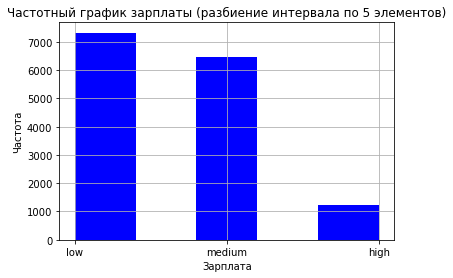

In [53]:
n, bins, patches = plt.hist(data['salary'], 5, facecolor='b')

plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.title('Частотный график зарплаты (разбиение интервала по 5 элементов)')
plt.grid(True)
plt.show()

Все более чем логично. В компании не очень много топ-менеджеров с высоким уровнем дохода.

**Распределение сотрудников, их зарплат в зависимости от департамента.**

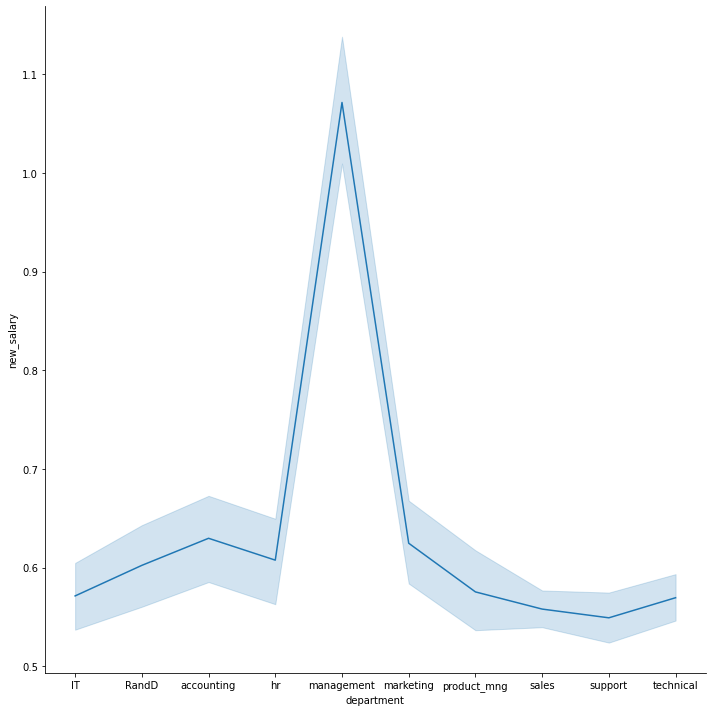

In [62]:
sns.relplot(x='department', 
            y='new_salary', 
            kind='line', 
            data=data,
            height = 10)

Мое предположение в следующем: наиболее высокие зарплаты в отделе менеджмента, так как этот отдел включает все управляющее звено.

**Сколько сотрудников покинули компанию?**

In [63]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

**Какие гипотезы можно выдвинуть?** К сожалению в таблице нет семейного статуста. Мне было бы интересно проанализировать статистику увольнений по этому параметру. Раз нет - пойдем по тому, что имеем.

Самая логичная, люди недовольные своей ЗП увольняются чаще. В этот раз применим тест ANOVA, он удобен при сравнении нескольких групп. 

Гипотезы:
- Н0 = уровень зарплаты не влияет на увольнение
- Н1 = уровень зарплаты влияет на увольнение

In [64]:
left_low_salary = data[data['new_salary']==0]['left']

left_middle_salary = data[data['new_salary']==1]['left']

left_high_salary = data[data['new_salary'] == 2]['left']


stats.f_oneway(left_low_salary, left_middle_salary, left_high_salary)

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

У нас есть основания отвергнуть нулевую гипотезу. Правда, это не гарантирует нам, что мы не совершили ошибку первого рода.

In [66]:
print(data[data['new_salary'] == 2]['left'].mean())
print(data[data['new_salary'] != 2]['left'].mean())

0.06628940986257073
0.2535241970643802


Действительно, сотрудники с более высокой зарплатой увольняются реже.

Проверять гипотезу, связанную с уровнем удовлетворенности, скучно. Пусть будет гипотеза, что люди, проводящие много времени на работе, фанатично относятся к работе и увольняются реже.
- Н0 = увольнение не зависит от того, трудоголик ли сотрудник.
- Н1 = зависимость есть.

In [69]:
hours_mean = data['average_montly_hours'].mean()

In [72]:
left_1 = data[data['average_montly_hours'] >= hours_mean]['left']

left_2 = data[data['average_montly_hours'] < hours_mean]['left']

result = stats.ttest_ind(left_1, left_2, equal_var=False)

print(result)
if (result.pvalue < 0.05):
    print('Отвергаем нулевую гипотезу, увольнение зависит от трудоголизма')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=5.976165985436297, pvalue=2.3366827367064415e-09)
Отвергаем нулевую гипотезу, увольнение зависит от трудоголизма


In [73]:
print(data[data['average_montly_hours'] >= hours_mean]['left'].mean())
print(data[data['average_montly_hours'] < hours_mean]['left'].mean())

0.2591690350521045
0.2176084099868594


Получилось в точности наоборот от того, как мы предполагали. Люди, проводящие больше времени на работе, увольняются чаще.